<a href="https://colab.research.google.com/github/ayogkr21/HandWritten-Digit-Classifiction-using-CNN-Deep-Learning-Model/blob/main/HandWritten_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train = X_train / 255
X_test = X_test / 255

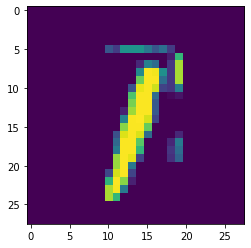

In [4]:
plt.imshow(X_train[67])

In [5]:
y_train[67]

1

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [8]:
convolutional_neural_network = models.Sequential([
    layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [9]:
convolutional_neural_network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
convolutional_neural_network.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 54s 28ms/step - loss: 0.2388 - accuracy: 0.9262
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0817 - accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0594 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0467 - accuracy: 0.9856
Epoch 5/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0374 - accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0301 - accuracy: 0.9903
Epoch 7/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0264 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0207 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0181 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 50s 26m

In [10]:
convolutional_neural_network.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0515 - accuracy: 0.9874


[0.05150653049349785, 0.9873999953269958]

In [11]:
y_predicted_by_model = convolutional_neural_network.predict(X_test)
y_predicted_by_model[0]

313/313 [==============================] - 3s 9ms/step


array([4.4925756e-08, 2.2037791e-06, 4.5028013e-08, 5.7313400e-07,
       2.3230274e-07, 8.7140029e-10, 8.4857633e-15, 9.9998885e-01,
       5.9626006e-09, 7.9867104e-06], dtype=float32)

In [12]:
np.argmax(y_predicted_by_model[0])

7

In [13]:
y_predicted_labels = [np.argmax(i) for i in y_predicted_by_model]

In [14]:
y_predicted_labels[2:5]

[1, 0, 4]

In [15]:
wrong_preds = []
for i in range(len(y_test)):
  if y_test[i] != y_predicted_labels[i]:
    wrong_preds.append(i)

wrong_preds[:10]

[321, 340, 362, 445, 449, 495, 582, 583, 646, 659]

correct - 2
predicted - 8


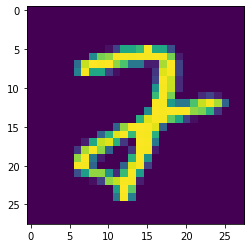

In [16]:
index = 583
plt.imshow(X_test[index])
print('correct -', y_test[index])
print('predicted -', y_predicted_labels[index])